<a href="https://colab.research.google.com/github/divyall/Data-Cleaning-and-Preprocessing-task1L1/blob/main/task2_L1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd # pandas for data handling
import numpy as np # numpy for numerical operations
import matplotlib.pyplot as plt # matplotlib & seaborn for visualizations
import seaborn as sns #


In [6]:
# Load CSV file
data = pd.read_csv("2) Stock Prices Data Set.csv")

# Get basic info about the dataset
print(data.info())

# Look at first few rows
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
None
  symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391


In [7]:
# Check how many missing values in each column
print(data.isnull().sum())

# Option 1: Remove rows with missing values
data = data.dropna()

# Option 2: Fill missing values with previous values
# data = data.fillna(method='ffill')


symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64


In [8]:
# Summary stats
stats = data[["open","high","low","close","volume"]].agg(["mean","median","std"]).T

# Mode calculation
mode_values = data[["open","high","low","close","volume"]].mode().iloc[0]
stats["mode"] = mode_values

print(stats)


                mean        median           std       mode
open    8.635227e+01  6.497000e+01  1.014712e+02       70.0
high    8.713272e+01  6.556000e+01  1.023123e+02       72.0
low     8.555262e+01  6.435740e+01  1.005712e+02       77.0
close   8.636859e+01  6.498000e+01  1.014715e+02       34.5
volume  4.253695e+06  2.085013e+06  8.232210e+06  1241019.0


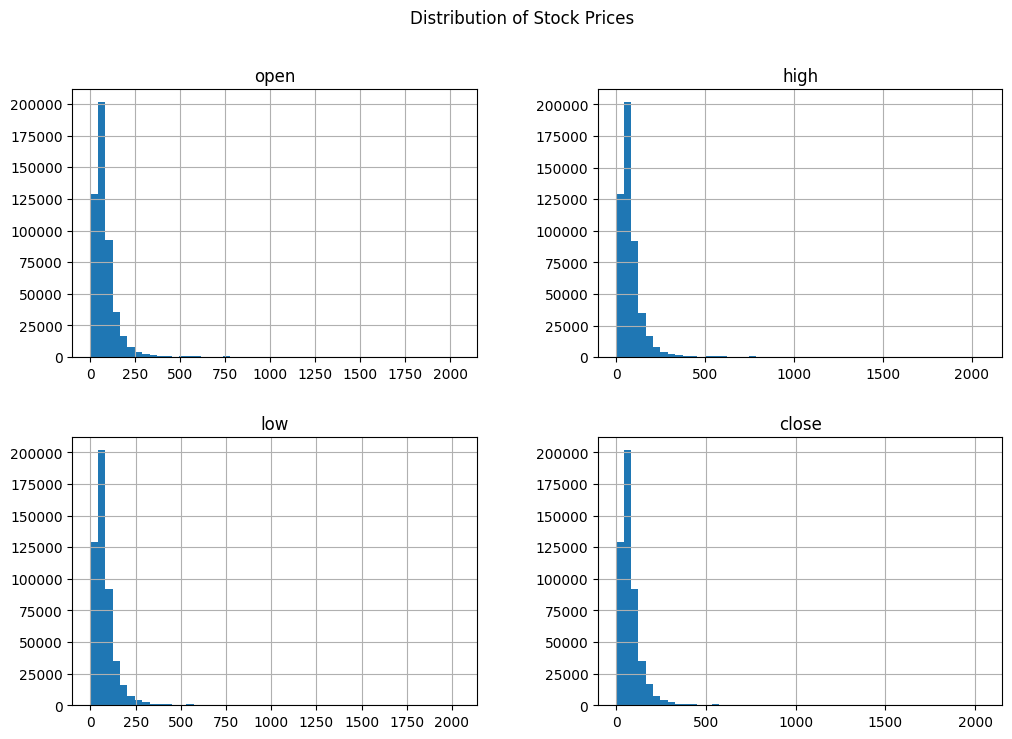

In [17]:
# Histograms To check distribution of prices
data[["open","high","low","close"]].hist(bins=50, figsize=(12,8))
plt.suptitle("Distribution of Stock Prices")
plt.show()



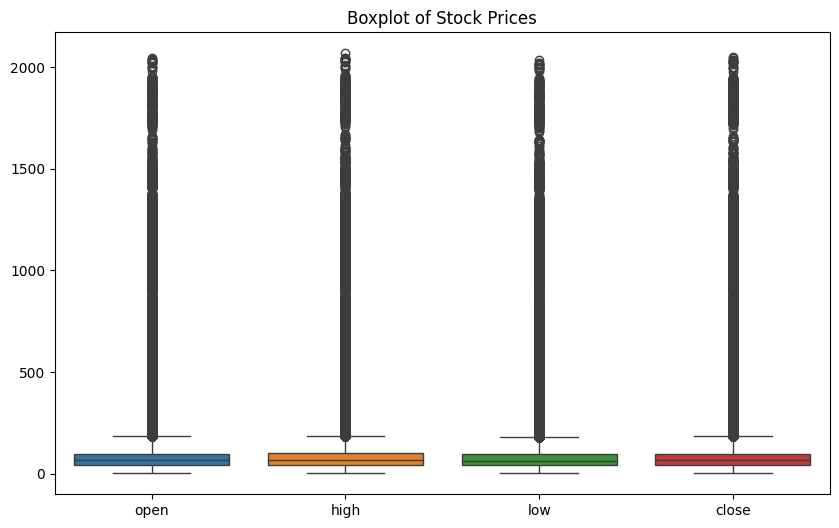

In [11]:
# Boxplots To detect outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=data[["open","high","low","close"]])
plt.title("Boxplot of Stock Prices")
plt.show()


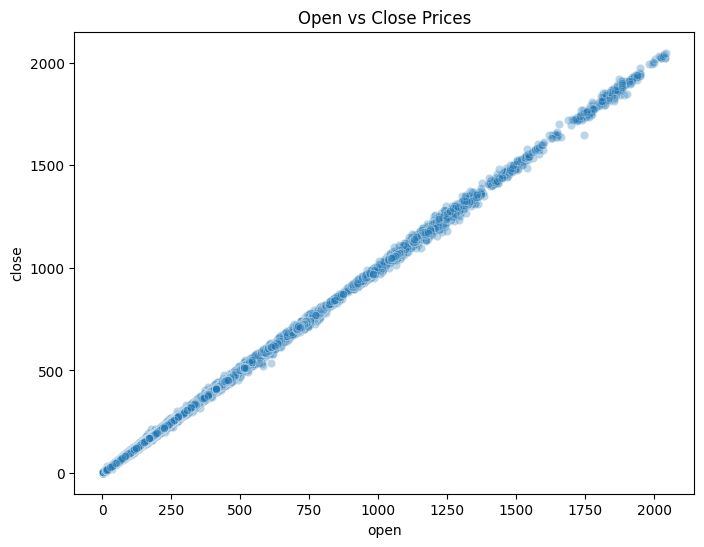

In [12]:
#Scatter Plot To see relation between Open and Close
plt.figure(figsize=(8,6))
sns.scatterplot(x="open", y="close", data=data, alpha=0.3)
plt.title("Open vs Close Prices")
plt.show()



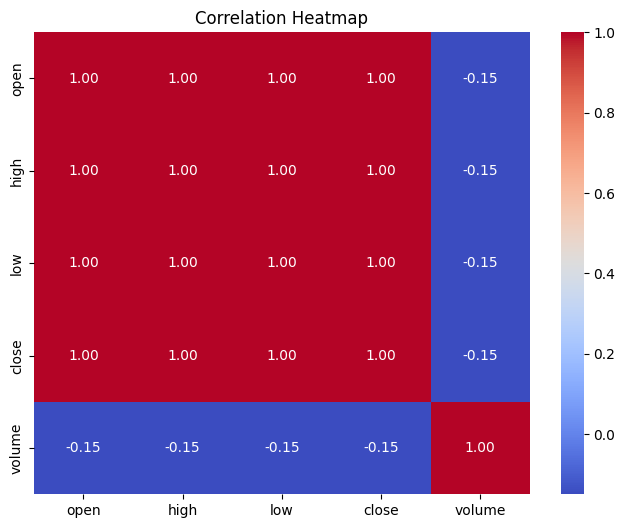

In [18]:
#: Correlation Analysis

corr = data[["open","high","low","close","volume"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
